In [117]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import math
import itertools
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from mlrefined_libraries import math_optimization_library as optlib
from sklearn.linear_model import LinearRegression
static_plotter = optlib.static_plotter.Visualizer();
import lib.linear_regression as linear
import lib.plot as show


${6.12}$

In [118]:
#preparation
datapath="./data/"
csvName=datapath+'2d_classification_data_v1.csv'
data=np.asarray(pd.read_csv(csvName,header=None))
x=data[:-1,:].T
y=data[-1:,:].T
w=np.array([[1],[1]])
lam=10**(-3)
x_b=np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
def model(x,w):
    return x.dot(w)
def gradientDescent(x, y, w, cost, gradient, alpha=0.1, max_its=100):
    weight_history = [w]          
    cost_history = [cost(w)]
    for _ in range(max_its):
        grad_eval = gradient(w)
        w = w - alpha*grad_eval
        weight_history.append(w)
        cost_history.append(cost(w))
    return weight_history, cost_history
def softmaxCost(w):
    p = y.size
    a = 1 + np.exp(-y * model(x_b, w))
    cost = (1 / p) * np.sum(np.log(a))
    cost += lam*np.sum(w[1:]**2)
    return cost
def softmaxGradient(w):
    p = y.size
    a = np.exp(y * model(x_b, w))
    return - (1 / p) * (y*x_b).T.dot((1/(1 + a))) + lam * w
def softmaxRes(x, w):
    x_b = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    return np.sign(model(x_b, w))

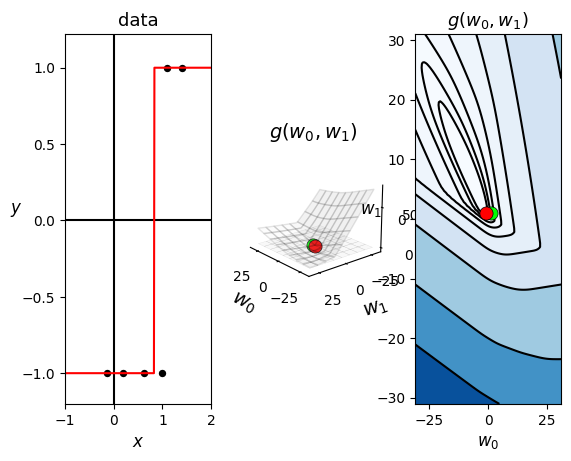

In [120]:
# 6.12 
wHis,costHis=gradientDescent(x_b,y,w,softmaxCost,softmaxGradient)
k=1
ax1=plt.subplot(1,3,1)
wF=wHis[-1]
show.plotScatter(ax1,softmaxRes,wF,(x,y),-1,2)
ax2=plt.subplot(1,3,2,projection="3d")
show.plot3D(ax2,softmaxCost,xmin=-30,xmax=30,ymin=-30,ymax=30,view=(20,140))
show.plotWeight3D(ax2,softmaxCost,wHis,cost_history=costHis)
ax3=plt.subplot(1,3,3)
show.plotContour(ax3,softmaxCost,31,25)
show.plotWeight3D(ax3,softmaxCost,wHis)

${6.13}$

softmax misclassification: 18
perceptron misclassification: 24


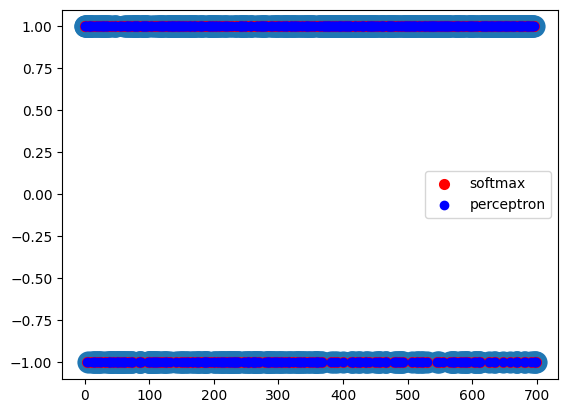

In [195]:
csvName=datapath+'breast_cancer_data.csv'
data=np.loadtxt(csvName,delimiter=',')
x=data[:-1,:].T
y=data[-1:,:].T
w=np.ones(shape=(9,1))
x_b=np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
wHis,_=gradientDescent(x_b,y,w,softmaxCost,softmaxGradient)
def gradientDescentPercep(x, y, w, cost, gradient, alpha=0.1, max_its=100):
    weight_history = [w]          
    cost_history = [cost(w)]
    for _ in range(max_its):
        grad_eval = gradient(w)
        w = w - alpha*grad_eval
        weight_history.append(w)
        cost_history.append(cost(w))
    return weight_history, cost_history
def perceptionCost(w):
    p=y.size
    a=-y*model(x_b,w)
    for i in range(len(a)):
        if a[i][0]<0:
            a[i]=np.array([0])
    return (1/p)*np.sum(a)
def perceptionGrad(w):
    tmp=np.sign(-y.T.dot(x_b))
    for i in range(len(tmp)):
        if tmp[i][0]==-1:
            tmp[i][0]=0
    return tmp.T
def perceptionRes(x, w):
    x_b = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    return np.sign(model(x_b, w))
wF=wHis[-1]
yPredSoftMax=softmaxRes(x,wF)
w=np.ones(shape=(9,1))
wHisPercep,_=gradientDescentPercep(x,y,w,perceptionCost,perceptionGrad)
wF=wHisPercep[-1]
yPredPercep=model(x_b,wF)
x_range=np.linspace(0,y.size-1,y.size)
mis1=0
mis2=0
for i in range(len(yPredPercep)):
    if yPredPercep[i]!=y[i]:
        mis2+=1
    if yPredSoftMax[i]!=y[i]:
        mis1+=1
print("softmax misclassification:",mis1)
print("perceptron misclassification:",mis2)
plt.scatter(x_range,y,linewidths=10)
plt.scatter(x_range,yPredSoftMax,color='r',linewidths=2,label='softmax')
plt.scatter(x_range,yPredPercep,color='b',linewidths=1,label='perceptron')
plt.legend()
plt.show()

${6.15}$

In [234]:
from lib.linear_regression import normalization, standardization
csvName=datapath+'credit_dataset.csv'
data = np.loadtxt(csvName,delimiter = ',')
x = data[:-1,:].T
y = data[-1:,:].T
x=normalization(x)
x=standardization(x)
w=np.ones(shape=(21,1))
x_b=np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
wHis,_=gradientDescent(x_b,y,w,softmaxCost,softmaxGradient,alpha=0.001,max_its=1000)
yPred=softmaxRes(x,w)
actualGoodPredictGood=0
actualGoodPredictBad=0
actualBadPredictGood=0
actualBadPredictBad=0

for i in range(len(y)):
    if y[i]==1 and yPred[i]==1:
        actualGoodPredictGood+=1
    elif y[i]==1 and yPred[i]==-1:
        actualGoodPredictBad+=1
    elif y[i]==-1 and yPred[i]==1:
        actualBadPredictGood+=1
    elif y[i]==-1 and yPred[i]==-1:
        actualBadPredictBad+=1

print("actual good predict good:{}".format(actualGoodPredictGood))
print("actual good predict bad:{}".format(actualGoodPredictBad))
print("actual bad predict good:{}".format(actualBadPredictGood))
print("actual bad predict bad:{}".format(actualBadPredictBad))


actual good predict good:454
actual good predict bad:260
actual bad predict good:13
actual bad predict bad:273


${6.16}$

In [239]:
csvName = datapath + '3d_classification_data_v2_mbalanced.csv'
data1 = np.loadtxt(csvName,delimiter = ',')
x = data1[:-1,:].T
y = data1[-1:,:].T
print(x.shape)
print(y.shape)

mod=LinearRegression(normalize=True)
mod.fit(x,y)
yPred=mod.predict(x)
yPred=np.sign(yPred)
print(np.sum(yPred==y))
print("accuracy:{}".format(np.sum(yPred==y)/len(y)))

(55, 2)
(55, 1)
53
accuracy:0.9636363636363636
